<a href="https://colab.research.google.com/github/Nessnessrine/Projet_TaxiDriver/blob/main/Code_TaxiDriver_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse exploratoire


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install pyarrow

In [ ]:
#Lecture du fichier au format parquet
import pyarrow.parquet as pq
table = pq.read_table('yellow_tripdata_2023-03.parquet')
df=table.to_pandas()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [ ]:
print("Nombre de lignes : " , df.shape[0])
print("Nombre de variables : ",df.shape[1])

Nombre de lignes :  3403766
Nombre de variables :  19


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
df = df.drop(['fare_amount','extra','mta_tax','tip_amount','tolls_amount','congestion_surcharge','Airport_fee','improvement_surcharge','RatecodeID','store_and_fwd_flag','VendorID'],axis=1)

In [ ]:
print('Nombre de valeurs manquantes :')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Nombre de valeurs manquantes :
	tpep_pickup_datetime: 0
	tpep_dropoff_datetime: 0
	passenger_count: 87619
	trip_distance: 0
	PULocationID: 0
	DOLocationID: 0
	payment_type: 0
	total_amount: 0


#### Il y a 87 619 lignes qui contiennent des valeurs manquantes dans la colonne passenger_count nous allons donc les supprimer vu qu'elles ne representent que 2,57% des données

In [ ]:
df.dropna(inplace=True)
df.shape

(3316147, 8)

## Les valeurs aberrantes

In [ ]:
# Types du jeu de données
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

<Axes: >

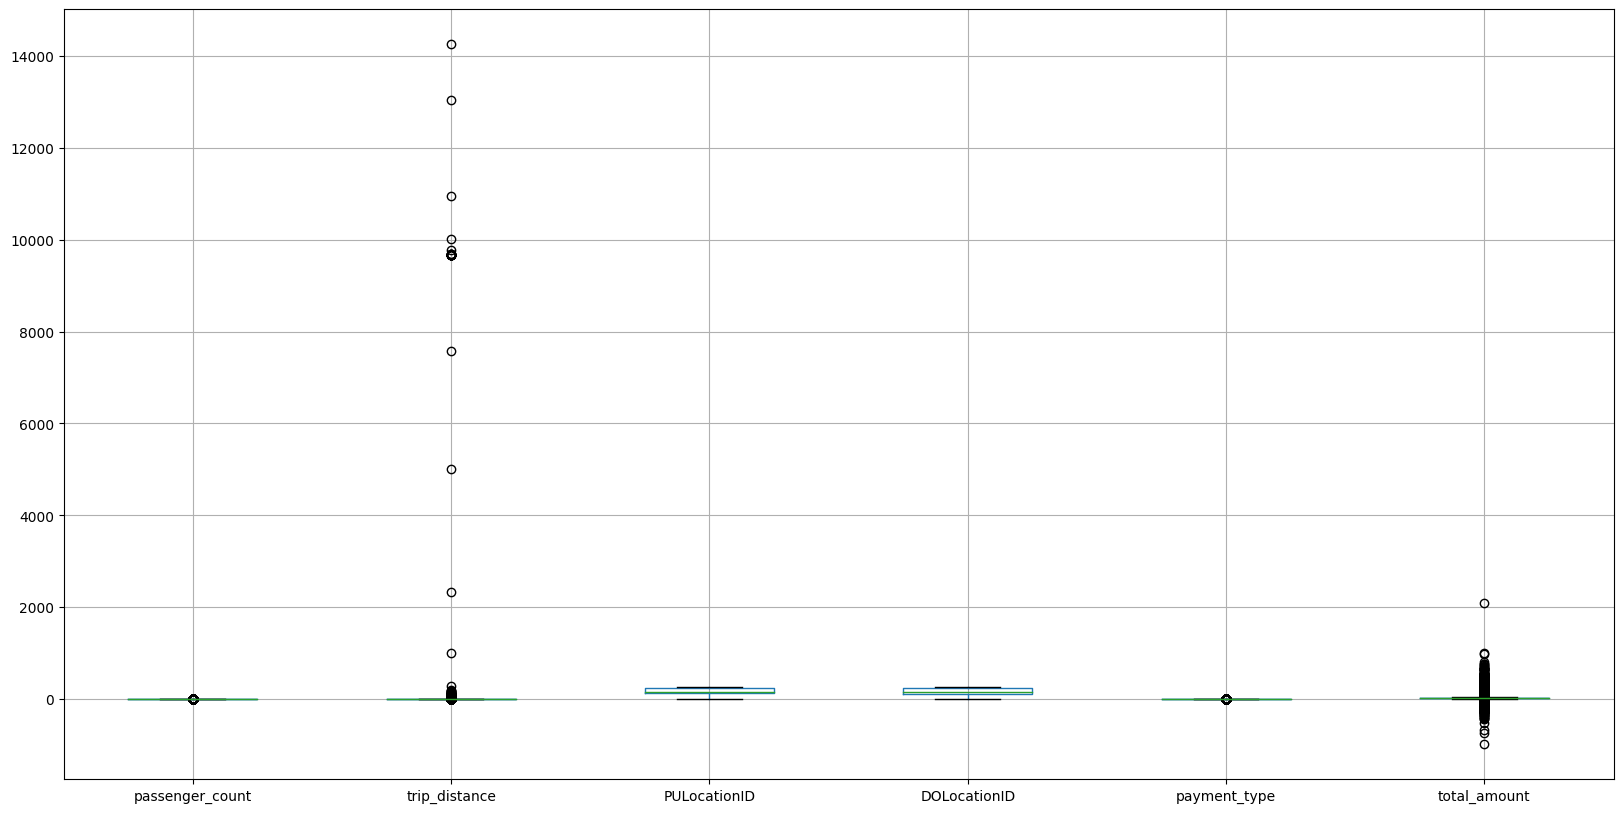

In [ ]:
# On va convertir certaines valeurs en numérique
col = ['passenger_count','trip_distance','PULocationID','DOLocationID','payment_type','total_amount']
df[col].boxplot(figsize=(20,10))

#### On constate qu'il y a des valeurs aberrantes pour trip distance et total_amount

Prix maximum : 2100.0
Prix minimum : -982.95


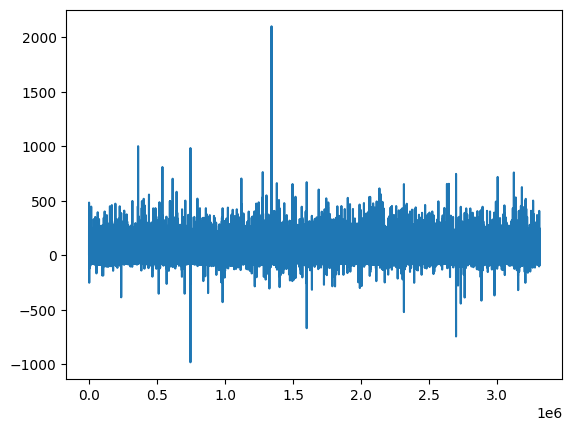

In [ ]:
# 'total_amount'

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))

#### En visualisant total amount on constate qu'il y a des montants négatifs et des montants qui dépassent 2000. Nous allons commencer par supprimer les lignes sur lesquelles le montant est négatif

#### D'aprés le site www.new-york.fr le tarif minimum d'un taxi est de 3 dollars, nous allons donc supprimer tout les tarifs < à cette valeurs

In [ ]:
#Suppression des lignes avec prix inférieur à 0$ : seulement 0.9% du fichier
df=df[df['total_amount']>=3]

Prix maximum : 2100.0
Prix minimum : 3.0


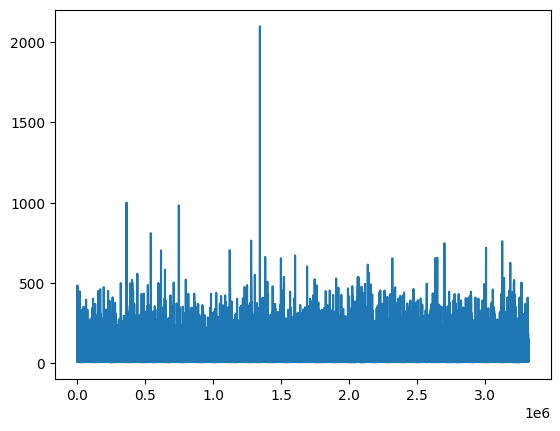

In [ ]:
# 'total_amount'

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))

In [ ]:
df[df['total_amount']>=800]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
361044,2023-03-04 09:30:52,2023-03-04 09:42:20,1.0,2.30,226,83,1,1000.00
539814,2023-03-05 21:55:13,2023-03-06 15:22:22,1.0,13.00,265,3,2,809.10
745928,2023-03-07 23:03:14,2023-03-08 02:10:29,1.0,144.96,132,265,4,982.95
1342230,2023-03-13 14:51:52,2023-03-13 14:51:52,0.0,0.00,264,264,1,2100.00


#### Au vue de ce tableau ci dessus certaines données ayant des valeurs abbérantes au niveau du paiement sont correctes et d'autres non

Prix maximum : 982.95
Prix minimum : 3.0


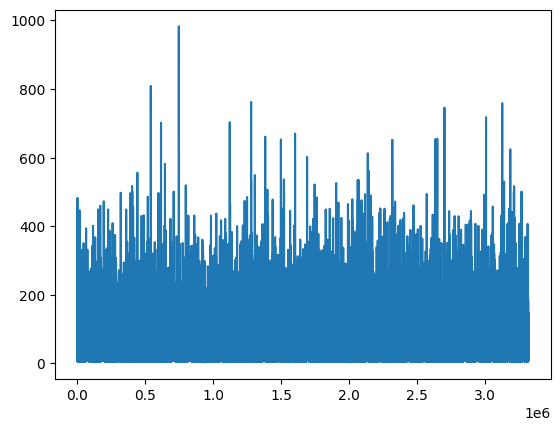

In [ ]:
df = df[df['total_amount'] < 1000]
#On a supprimé 2 lignes : 1000 et 2100

df['total_amount'].plot()
#données aberrantes
print('Prix maximum : '+str(df['total_amount'].max()))
print('Prix minimum : '+str(df['total_amount'].min()))


#### Nous pouvons constater que la variable Trip distance contient des valeurs = 0 sachant que le total amount est > 0

In [ ]:
df=df[df['trip_distance']>0]

distance maximum : 14257.91
distance minimum : 0.01


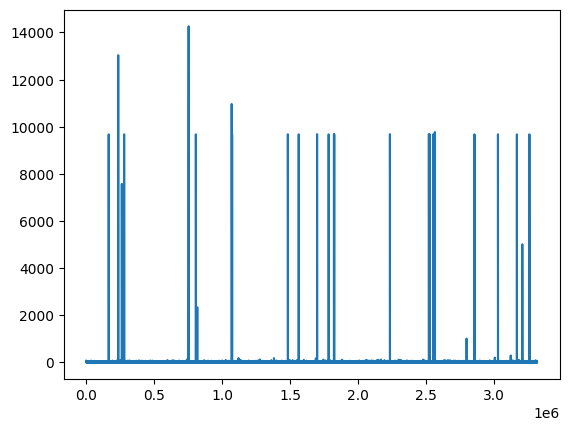

In [ ]:
# Trip_Distance

df['trip_distance'].plot()
#données aberrantes
print('distance maximum : '+str(df['trip_distance'].max()))
print('distance minimum : '+str(df['trip_distance'].min()))


In [ ]:
df[df['trip_distance']>240]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
165836,2023-03-02 15:45:34,2023-03-02 16:00:45,1.0,9674.01,161,68,1,20.20
236005,2023-03-03 06:04:19,2023-03-03 06:19:43,1.0,13032.40,75,142,1,18.76
262282,2023-03-03 12:01:53,2023-03-03 12:12:38,1.0,7571.55,162,163,1,18.48
279590,2023-03-03 15:39:12,2023-03-03 16:00:02,1.0,9676.40,87,112,1,33.60
752920,2023-03-08 06:41:30,2023-03-08 07:24:04,1.0,10011.29,132,61,1,66.29
753670,2023-03-08 06:33:33,2023-03-08 07:03:31,1.0,14257.91,82,75,1,35.17
806684,2023-03-08 15:49:52,2023-03-08 16:00:20,1.0,9675.23,138,260,1,24.65
817410,2023-03-08 17:33:44,2023-03-08 18:01:40,1.0,2335.96,161,255,1,46.63
1070240,2023-03-10 19:12:22,2023-03-10 19:18:55,1.0,10961.43,140,263,2,15.10
1073514,2023-03-10 19:48:23,2023-03-10 20:02:28,1.0,9673.99,161,229,1,23.16


#### En général un taxi roule entre 120 et 240 Km par jour
#### Nous allons dans un premier temps supprimer tous les trajets supérieurs à 240 km et inférieur à 0,32 km (le minimum)

In [ ]:
df= df[df['trip_distance']<240]

In [ ]:
df= df[df['trip_distance']>0.32]

distance maximum : 198.07
distance minimum : 0.33


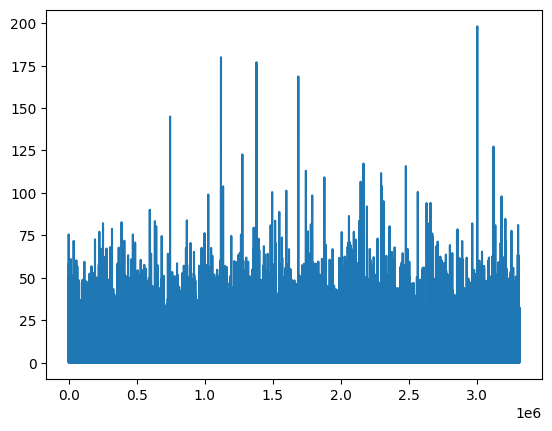

In [ ]:
# Trip_Distance

df['trip_distance'].plot()
#données aberrantes
print('distance maximum : '+str(df['trip_distance'].max()))
print('distance minimum : '+str(df['trip_distance'].min()))

In [ ]:
# Dimmension
df.shape

(3207236, 8)

<Axes: >

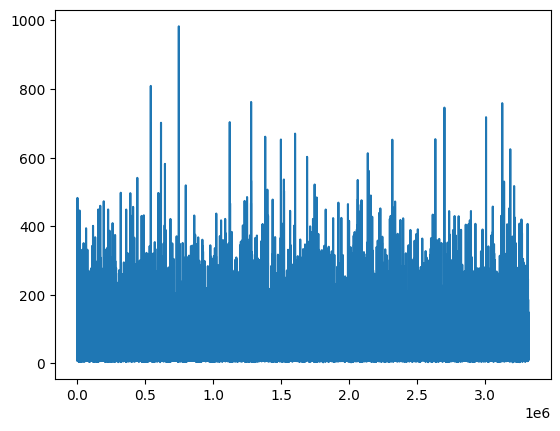

In [ ]:
df['total_amount'].plot()

Création de la variable "durée"

In [ ]:
df['durée']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25


In [ ]:
#Décomposition de la date de départ
df['mois'] = df.tpep_pickup_datetime.dt.month
df['jour'] = df.tpep_pickup_datetime.dt.day
df['jour_semaine'] = df.tpep_pickup_datetime.dt.weekday
df['annee'] = df.tpep_pickup_datetime.dt.year
df['heure'] = df.tpep_pickup_datetime.dt.hour
df['minute'] = df.tpep_pickup_datetime.dt.minute

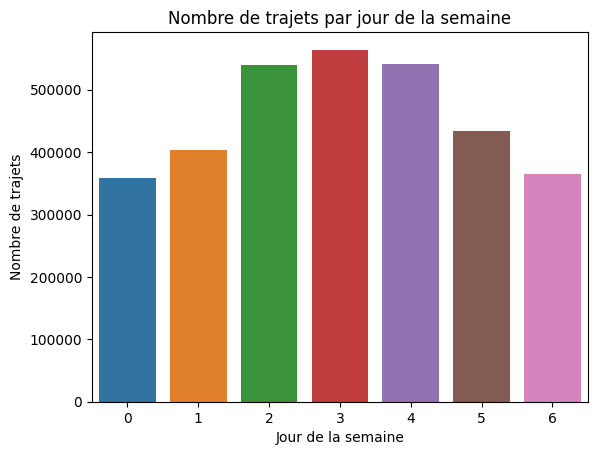

In [ ]:
sns.countplot(x='jour_semaine', data=df)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de trajets')
plt.title('Nombre de trajets par jour de la semaine')
plt.xticks(rotation=0)
plt.show()

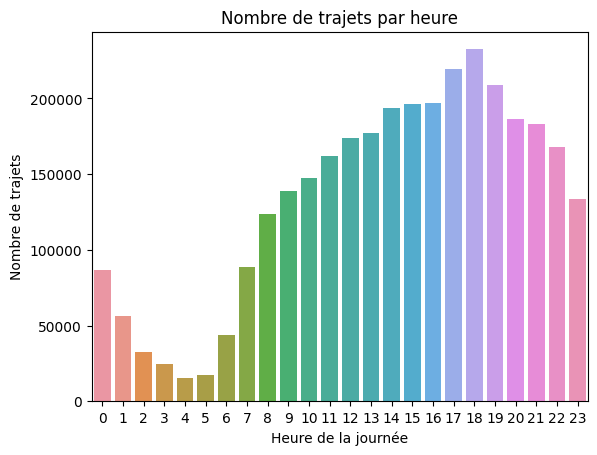

In [ ]:
sns.countplot(x='heure', data=df)
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de trajets')
plt.title('Nombre de trajets par heure')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Calcul de la durée en minute
df['duree_minute'] = df.durée.dt.total_seconds()/60
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,duree_minute
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,31.083333
2,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,140,186,1,28.05,0 days 00:14:22,3,1,2,2023,0,15,14.366667
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28,3,1,2,2023,0,49,11.466667
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02,3,1,2,2023,0,8,3.033333
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25,3,1,2,2023,0,9,8.416667


In [ ]:
#Fonction qui permet d'afficher la durée au format hh:mm:ss
def format_duree_trajet(row):
    heures = row['durée'].seconds // 3600
    minutes = (row['durée'].seconds % 3600) // 60
    secondes = row['durée'].seconds % 60
    return f"{heures:02d}:{minutes:02d}:{secondes:02d}"

df['durée2'] = df.apply(format_duree_trajet, axis=1)

Nous avons remarqué des lignes ayant un nombre de passagers égal à 0

In [ ]:
df['passenger_count'].min()

0.0

In [ ]:
df=df[df['passenger_count']>0]

In [ ]:
df['passenger_count'].min()

1.0

Un taxi new-yorkais ne peut prendre que 4 passagers maximum

In [ ]:
df=df[df['passenger_count']<5]

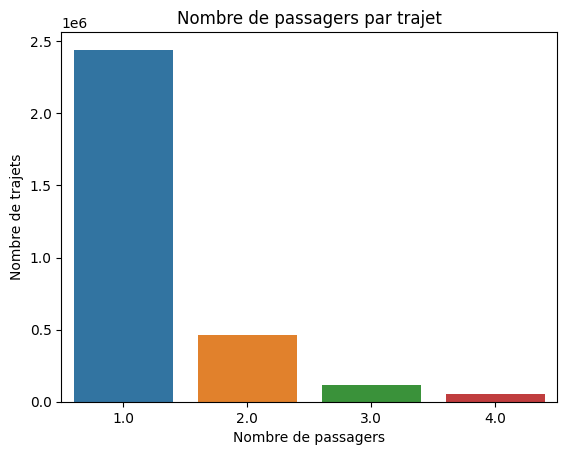

In [ ]:
sns.countplot(x='passenger_count', data=df)
plt.xlabel('Nombre de passagers')
plt.ylabel('Nombre de trajets')
plt.title('Nombre de passagers par trajet')
plt.xticks(rotation=0)
plt.show()

XGBoost

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,duree_minute,durée2
1,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,31.083333,00:31:05
3,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,140,43,1,24.70,0 days 00:11:28,3,1,2,2023,0,49,11.466667,00:11:28
4,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,79,137,1,14.64,0 days 00:03:02,3,1,2,2023,0,8,3.033333,00:03:02
5,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,162,137,1,18.00,0 days 00:08:25,3,1,2,2023,0,9,8.416667,00:08:25
6,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,170,48,1,20.50,0 days 00:09:47,3,1,2,2023,0,32,9.783333,00:09:47


In [ ]:
# Séparation des features et de la target
X = df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','total_amount','payment_type','durée','durée2'])
y = df['total_amount']

In [ ]:
X.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'mois', 'jour', 'jour_semaine', 'annee', 'heure', 'minute',
       'duree_minute'],
      dtype='object')

In [ ]:
X.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,mois,jour,jour_semaine,annee,heure,minute,duree_minute
1,2.0,12.40,138,231,3,1,2,2023,0,8,31.083333
3,1.0,2.90,140,43,3,1,2,2023,0,49,11.466667
4,1.0,1.23,79,137,3,1,2,2023,0,8,3.033333
5,1.0,1.20,162,137,3,1,2,2023,0,9,8.416667
6,1.0,1.80,170,48,3,1,2,2023,0,32,9.783333


In [ ]:
X.passenger_count.value_counts()

1.0    2440681
2.0     465252
3.0     114484
4.0      56475
Name: passenger_count, dtype: int64

In [ ]:
print("Taille de l'ensemble de données :", X.shape)
print("Nombre d'échantillons : ", X.shape [0])
print("Nombre de features : ", X.shape [1])

Taille de l'ensemble de données : (3076892, 11)
Nombre d'échantillons :  3076892
Nombre de features :  11


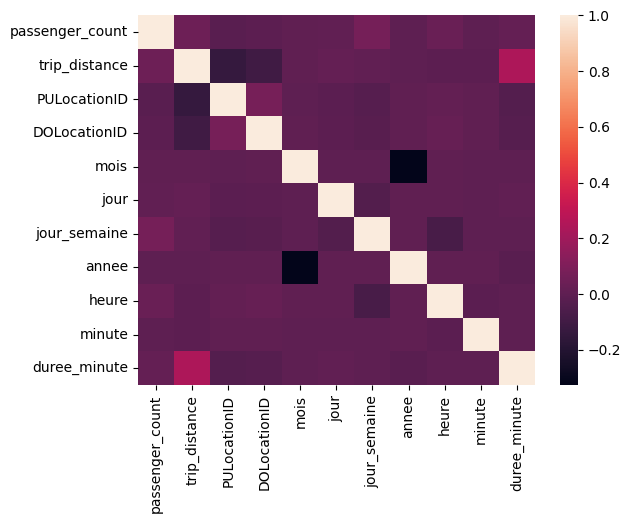

In [ ]:
corr = X.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
# Importer les bibliothèques nécessaires
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

passenger_count    float64
trip_distance      float64
PULocationID         int32
DOLocationID         int32
mois                 int64
jour                 int64
jour_semaine         int64
annee                int64
heure                int64
minute               int64
duree_minute       float64
dtype: object

In [ ]:
# Créer un objet DMatrix pour les données XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Définir les hyperparamètres du modèle
params = {
    "max_depth": 3,
    "eta": 0.1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "seed": 42
}

In [ ]:
# Entraîner le modèle
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [ ]:
# Faire des prédictions sur l'ensemble de test
preds = model.predict(dtest)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Calculer l'erreur quadratique moyenne (RMSE) des prédictions
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

RMSE : 5.0220697273023465
R2 : 0.9479782344064912


In [ ]:
# Prédiction sur l'ensemble de test
for i in range(10):
    print("Prédictions des prix: %.2f, Vraie valeur (prix): %.2f"%(preds[i], y_test.iloc[i]))


Prédictions des prix: 18.74, Vraie valeur (prix): 19.80
Prédictions des prix: 18.10, Vraie valeur (prix): 19.32
Prédictions des prix: 13.07, Vraie valeur (prix): 11.05
Prédictions des prix: 20.68, Vraie valeur (prix): 20.93
Prédictions des prix: 16.31, Vraie valeur (prix): 16.80
Prédictions des prix: 12.00, Vraie valeur (prix): 10.50
Prédictions des prix: 25.98, Vraie valeur (prix): 26.88
Prédictions des prix: 20.70, Vraie valeur (prix): 18.50
Prédictions des prix: 21.51, Vraie valeur (prix): 21.48
Prédictions des prix: 33.27, Vraie valeur (prix): 31.80


In [ ]:
data = pd.DataFrame({'passenger_count': [2],'trip_distance': [np.nan],
                     'PULocationID': [180],'DOLocationID': [43],'mois': [3],
                     'jour': [26],'jour_semaine': [np.nan],'annee': [2023],
                     'heure': [18],'minute': [50],'duree_minute': [np.nan]})

In [ ]:
print(model.predict(xgb.DMatrix(data)))

[42.000687]


Carte de New York

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Chargement des données de Covid-19 par pays
zone_taxi = pd.read_csv('zone_taxiii.csv',delimiter=';')

In [ ]:
zone_taxi.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
zone_taxi2=zone_taxi[['LocationID','Borough']]
zone_taxi2.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [ ]:
merged = df.merge(zone_taxi2, left_on='PULocationID', right_on='LocationID')
merged.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,durée,mois,jour,jour_semaine,annee,heure,minute,duree_minute,durée2,LocationID,Borough
0,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,138,231,1,76.49,0 days 00:31:05,3,1,2,2023,0,8,31.083333,00:31:05,138,Queens
1,2023-03-01 00:25:51,2023-03-01 00:55:03,1.0,9.50,138,10,1,101.90,0 days 00:29:12,3,1,2,2023,0,25,29.200000,00:29:12,138,Queens
2,2023-03-01 00:19:08,2023-03-01 00:36:39,1.0,9.39,138,230,1,68.88,0 days 00:17:31,3,1,2,2023,0,19,17.516667,00:17:31,138,Queens
3,2023-03-01 00:02:15,2023-03-01 00:33:46,1.0,9.80,138,61,1,64.50,0 days 00:31:31,3,1,2,2023,0,2,31.516667,00:31:31,138,Queens
4,2023-03-01 00:33:30,2023-03-01 00:43:34,1.0,3.90,138,7,1,31.45,0 days 00:10:04,3,1,2,2023,0,33,10.066667,00:10:04,138,Queens


In [ ]:
merged=merged.drop(columns=['LocationID'])
merged.head()

In [ ]:
merged['QuartierDepart']=merged['Borough']
merged.head()

In [ ]:
merged=merged.drop(columns=['Borough'])

In [ ]:
merged2 = merged.merge(zone_taxi2, left_on='DOLocationID', right_on='LocationID')
merged2.head()

In [ ]:
merged2['QuartierArrivee']=merged2['Borough']

In [ ]:
merged2=merged2.drop(columns=['PULocationID','DOLocationID','LocationID','Borough'])

Réseaux de neurones

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définir le modèle
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear')) # Couche de sortie

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Entraîner le modèle
history=model.fit(X_train, y_train, epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
61538/61538 [==============================] - 85s 1ms/step - loss: 73.8682 - val_loss: 35.6324
Epoch 2/20
61538/61538 [==============================] - 84s 1ms/step - loss: 35.6401 - val_loss: 34.2421
Epoch 3/20
61538/61538 [==============================] - 94s 2ms/step - loss: 33.7966 - val_loss: 30.9340
Epoch 4/20
61538/61538 [==============================] - 94s 2ms/step - loss: 33.1838 - val_loss: 32.4977
Epoch 5/20
61538/61538 [==============================] - 93s 2ms/step - loss: 32.6772 - val_loss: 31.4308
Epoch 6/20
61538/61538 [==============================] - 93s 2ms/step - loss: 32.3819 - val_loss: 30.3583
Epoch 7/20
61538/61538 [==============================] - 94s 2ms/step - loss: 32.2839 - val_loss: 31.8374
Epoch 8/20
61538/61538 [==============================] - 87s 1ms/step - loss: 32.0811 - val_loss: 35.1663
Epoch 9/20
61538/61538 [==============================] - 95s 2ms/step - loss: 31.9521 - val_loss: 31.3553
Epoch 10/20
61538/61538 [============

In [ ]:
#history=model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

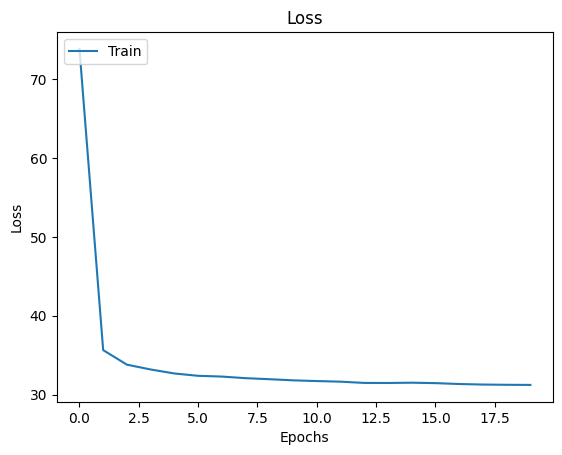

In [ ]:
# 1) Visualisation de la courbe d'apprentissage et de validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # fonction de perte (loss)
#plt.plot(history.history['mse']) # Métrique de performance
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Évaluer le modèle
mse = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.2f' % mse)

MSE: 31.61


In [ ]:
# Faire des prédictions (fonction predict())
predictions = model.predict(X_test)

19231/19231 [==============================] - 17s 878us/step


In [ ]:
print(r2_score(y_test, predictions))

0.9348061243214216


KNN

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Séparation des features et de la target
X = df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','total_amount','payment_type','durée','durée2'])
y = df['total_amount']

# Normalisation des données
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X) #X_scaled : données normalisées

In [ ]:
# Division en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Entraînement du modèle k-NN avec k=5
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)

In [ ]:
# Prédiction sur l'ensemble de test
y_pred=KNN.predict(X_test)

In [ ]:
# Calculer l'erreur quadratique moyenne (RMSE) des prédictions
rmse = mean_squared_error(y_pred, y_test, squared=False)
r2 = r2_score(y_pred, y_test)

print(f"RMSE : {rmse}")
print(f"R2 : {r2}")